# Indian ID Validator Tutorial and Playground

Welcome to the tutorial for the **Indian ID Validator** model, hosted at [Hugging Face](https://huggingface.co/logasanjeev/indian-id-validator)! This notebook is a hands-on guide to using the model to classify, detect, and extract text from Indian identification documents, including:

- **Aadhaar Card** (front and back)
- **PAN Card** (front)
- **Passport** (front)
- **Voter ID** (front and back)
- **Driving License** (front)

## What You’ll Learn
- **Classify** ID types using the `Id_Classifier` model.
- **Detect** specific fields (e.g., Name, DOB, Address) on ID images.
- **Extract** text from detected fields using OCR.
- Test the model with sample images or your own ID images.
- Understand the model’s features and how to integrate it into your projects.

## Features
- **Classification**: Identifies the ID type (e.g., `aadhar_front`, `passport`) with confidence scores.
- **Detection**: Locates fields on the ID using YOLO-based models.
- **OCR**: Extracts text from detected fields using PaddleOCR.
- **Preprocessing**: Enhances images (upscaling, denoising, contrast adjustment) for better accuracy.
- **Flexibility**: Supports auto-detection or specific model selection.

## Prerequisites
- A Google Colab account (free tier works).
- Basic Python knowledge (though this tutorial is beginner-friendly).
- Internet access to download model files from Hugging Face.

Let’s get started by setting up the environment!

**Expected Output**: No output, just an introduction.

## Step 1: Install Dependencies

This cell installs the necessary Python packages to run the Indian ID Validator. We use:
- `huggingface_hub`: To download model files, scripts, and sample images from the repository.
- Dependencies listed in `requirements.txt` (e.g., `ultralytics`, `paddleocr`, `opencv-python`, `numpy==1.24.4`, `pandas==2.2.2`).

### Why This Matters
The model relies on specific versions of libraries to ensure compatibility. Installing from `requirements.txt` guarantees the correct setup.

### What’s Happening
1. Install `huggingface_hub` quietly (`-q`).
2. Download `requirements.txt` from the repo.
3. Install all dependencies listed in `requirements.txt` without caching to save space.

**Expected Output**:
```
Downloading requirements.txt...
Installing dependencies...
```
If an error occurs, it will display the issue (e.g., missing `requirements.txt`).

In [ ]:
!pip install -q huggingface_hub

from huggingface_hub import hf_hub_download

print("Downloading requirements.txt...")
try:
    requirements_path = hf_hub_download(
        repo_id="logasanjeev/indian-id-validator",
        filename="requirements.txt"
    )
    print("Installing dependencies...")
    !pip install -q -r {requirements_path} --no-cache-dir
except Exception as e:
    print(f"Error installing dependencies: {e}")
    print("Please verify 'requirements.txt' exists in the repository.")
    raise

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


requirements.txt:   0%|          | 0.00/146 [00:00<?, ?B/s]

Installing dependencies...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 115.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 172.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 265.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 156.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 213.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 253.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 161.5 MB/s eta 0:00:00
   ━━━━━━━━

## Step 2: Download and Import inference.py

The `inference.py` script contains the core logic for processing ID images. This cell downloads it from the repository and imports its functions.

### Why This Matters
`inference.py` provides:
- `process_id`: Main function for classification, detection, and OCR.
- Specific functions: `aadhaar`, `pan_card`, `passport`, `voter_id`, `driving_license`.
- Preprocessing utilities for image enhancement.

### What’s Happening
1. Download `inference.py` from `logasanjeev/indian-id-validator`.
2. Copy it to the current directory.
3. Import the key functions for use in later cells.

**Expected Output**:
```
Deploying inference script...
Successfully downloaded inference.py
Loading inference functions...
Successfully imported inference functions
```
If `inference.py` is missing or incompatible, an error will guide you to check dependencies or the repo.

In [ ]:
# Import required libraries
from huggingface_hub import hf_hub_download
import shutil

print("\nDeploying inference script...")
try:
    inference_path = hf_hub_download(
        repo_id="logasanjeev/indian-id-validator",
        filename="inference.py"
    )
    shutil.copy2(inference_path, "inference.py")
    print("Successfully downloaded inference.py")
except Exception as e:
    print(f"Error downloading inference.py: {e}")
    print("Please verify that inference.py exists at https://huggingface.co/logasanjeev/indian-id-validator")
    raise

print("\nLoading inference functions...")
try:
    from inference import process_id, aadhaar, pan_card, passport, voter_id, driving_license
    print("Successfully imported inference functions")
except Exception as e:
    print(f"Error importing inference functions: {e}")
    print("Possible issues:")
    print("- Ensure all dependencies are installed correctly (check numpy==1.24.4, pandas==2.2.2).")
    print("- Verify that inference.py is compatible.")
    raise


Deploying inference script...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Successfully downloaded inference.py

Loading inference functions...


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


config.json:   0%|          | 0.00/2.87k [00:00<?, ?B/s]

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:17<00:00, 220.56it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:18<00:00, 547.01it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:17<00:00, 124.70it/s]


Successfully imported inference functions


## Step 3: Download Sample Images

This cell downloads sample ID images from the repository to test the model. The images include:
- `aadhaar_front.jpg`, `aadhaar_back.jpg`
- `pan_front.jpg`
- `passport_front.jpg`
- `voter_front.jpg`, `voter_back.jpg`
- `driving_license_front.jpg`

### Why This Matters
Sample images let you test the model without uploading your own. They cover all supported ID types, including front and back images

### What’s Happening
1. Define the list of sample images.
2. Create a `samples/` directory.
3. Download each image from the repo and save it locally.

**Expected Output**:
```
Downloading sample images...
Downloaded samples/aadhaar_front.jpg
Downloaded samples/aadhaar_back.jpg
Downloaded samples/pan_front.jpg
Downloaded samples/passport_front.jpg
Downloaded samples/voter_front.jpg
Downloaded samples/voter_back.jpg
Downloaded samples/driving_license_front.jpg
```
If an image is missing, an error will note which file failed.

In [ ]:
import os

print("\nDownloading sample images...")
sample_images = [
    "samples/aadhaar_front.jpg",
    "samples/aadhaar_back.jpg",
    "samples/pan_front.jpg",
    "samples/passport_front.jpg",
    "samples/voter_front.jpg",
    "samples/voter_back.jpg",
    "samples/driving_license_front.jpg"
]

os.makedirs("samples", exist_ok=True)
for sample in sample_images:
    try:
        local_path = hf_hub_download(
            repo_id="logasanjeev/indian-id-validator",
            filename=sample
        )
        shutil.copy2(local_path, sample)
        print(f"Downloaded {sample}")
    except Exception as e:
        print(f"Error downloading {sample}: {e}")

aadhaar_front.jpg:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

Downloaded samples/aadhaar_front.jpg


aadhaar_back.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

Downloaded samples/aadhaar_back.jpg


samples/pan_front.jpg:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

Downloaded samples/pan_front.jpg


passport_front.jpg:   0%|          | 0.00/87.3k [00:00<?, ?B/s]

Downloaded samples/passport_front.jpg


voter_front.jpg:   0%|          | 0.00/59.5k [00:00<?, ?B/s]

Downloaded samples/voter_front.jpg


samples/voter_back.jpg:   0%|          | 0.00/152k [00:00<?, ?B/s]

Downloaded samples/voter_back.jpg


samples/driving_license_front.jpg:   0%|          | 0.00/143k [00:00<?, ?B/s]

Downloaded samples/driving_license_front.jpg


## Step 4: Test Classification with Id_Classifier

This cell tests the `Id_Classifier` model to identify the type of each sample ID image (e.g., `aadhar_front`, `passport`). It uses `process_id` with `classify_only=True` to output only the document type and confidence score.

### Why This Matters
Classification is the first step in ID processing. The `Id_Classifier` model quickly identifies the ID type, which is useful for:
- Sorting IDs in bulk processing.
- Validating ID types before detection/OCR.
- Testing back images (e.g., `aadhaar_back`) that may not support detection.

### What’s Happening
- Loop through each sample image.
- Call `process_id` with `classify_only=True`, `save_json=False`, `verbose=False`.
- Output shows the detected document type and confidence (e.g., `Detected document type: aadhar_front with confidence: 0.98`).

**Note**: `aadhaar_back` and `voter_back` may be classified correctly but won’t proceed to detection unless detection models are added to `config.json`.

**Expected Output**:
```
=== Test 1: Id_Classifier on All Sample Images ===
Processing samples/aadhaar_front.jpg...
Detected document type: aadhar_front with confidence: 0.98
Processing samples/aadhaar_back.jpg...
Detected document type: aadhar_back with confidence: 0.97
Processing samples/pan_front.jpg...
Detected document type: pan_card_front with confidence: 0.99
Processing samples/passport_front.jpg...
Detected document type: passport with confidence: 0.99
Processing samples/voter_front.jpg...
Detected document type: voter_id with confidence: 0.97
Processing samples/voter_back.jpg...
Detected document type: aadhar_back with confidence: 0.96
Processing samples/driving_license_front.jpg...
Detected document type: driving_license_front with confidence: 0.96
```

In [ ]:
print("\n=== Test 1: Id_Classifier on All Sample Images ===")
try:
    for sample in sample_images:
        print(f"\nProcessing {sample}...")
        result = process_id(
            image_path=sample,
            save_json=False,
            verbose=False,
            classify_only=True
        )
except Exception as e:
    print(f"Error in Id_Classifier Test: {e}")


=== Test 1: Id_Classifier on All Sample Images ===

Processing samples/aadhaar_front.jpg...


models/Id_Classifier.pt:   0%|          | 0.00/25.9M [00:00<?, ?B/s]

Detected document type: aadhar_front with confidence: 1.00

Processing samples/aadhaar_back.jpg...
Detected document type: aadhar_back with confidence: 1.00

Processing samples/pan_front.jpg...
Detected document type: pan_card_front with confidence: 1.00

Processing samples/passport_front.jpg...
Detected document type: passport with confidence: 1.00

Processing samples/voter_front.jpg...
Detected document type: voter_id with confidence: 1.00

Processing samples/voter_back.jpg...
Detected document type: voter_id with confidence: 1.00

Processing samples/driving_license_front.jpg...
Detected document type: driving_license_front with confidence: 1.00


## Step 5: Test Aadhaar Card (End-to-End Processing)

This cell runs the full pipeline (classification, detection, OCR) on an Aadhaar card front image using the `aadhaar` function. It detects fields (e.g., Aadhaar Number, DOB, Name) and extracts text.

### Why This Matters
End-to-end processing showcases the model’s ability to:
- Classify the ID as `aadhar_front`.
- Detect fields using the `Aadhaar` detection model.
- Extract text with PaddleOCR.
- Visualize results (bounding boxes, extracted text).

### What’s Happening
- Call `aadhaar` with `verbose=True` to display visualizations.
- Save results to `detected_aadhaar.json`.
- Print the extracted text as a JSON dictionary.

**Expected Output**:
```
=== Test 2: Aadhaar Card on aadhaar_front.jpg ===
[Matplotlib visualizations: raw image, bounding boxes, OCR regions]
Aadhaar Card Results:
{
    "Aadhaar": "1234 5678 9012",
    "DOB": "01/01/1990",
    "Gender": "M",
    "Name": "John Doe",
    "Address": "123 Main St, City, State"
}
```


=== Test 2: Aadhaar Card on aadhaar_front.jpg ===


models/Aadhaar_Card.pt:   0%|          | 0.00/51.2M [00:00<?, ?B/s]

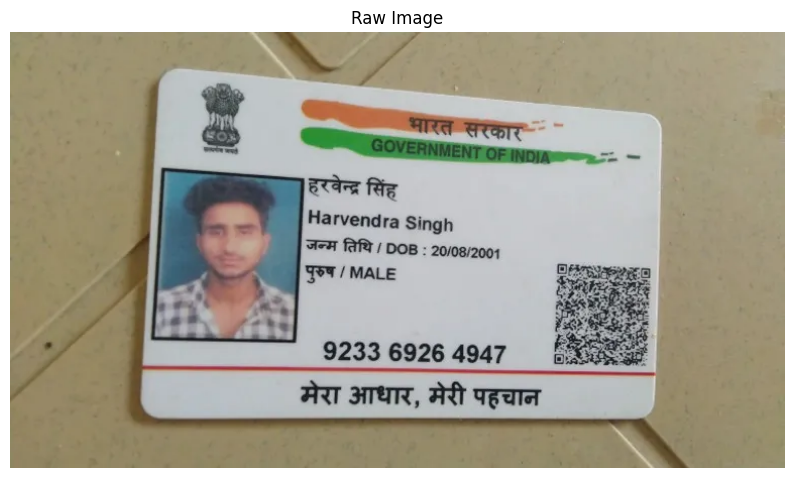

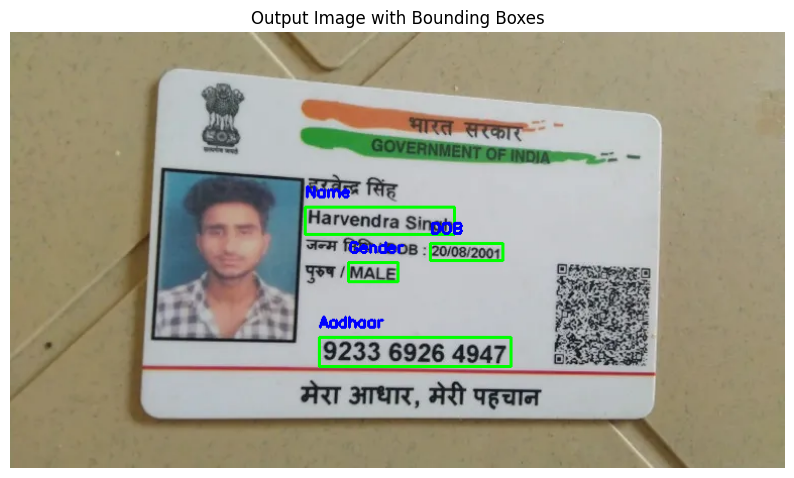

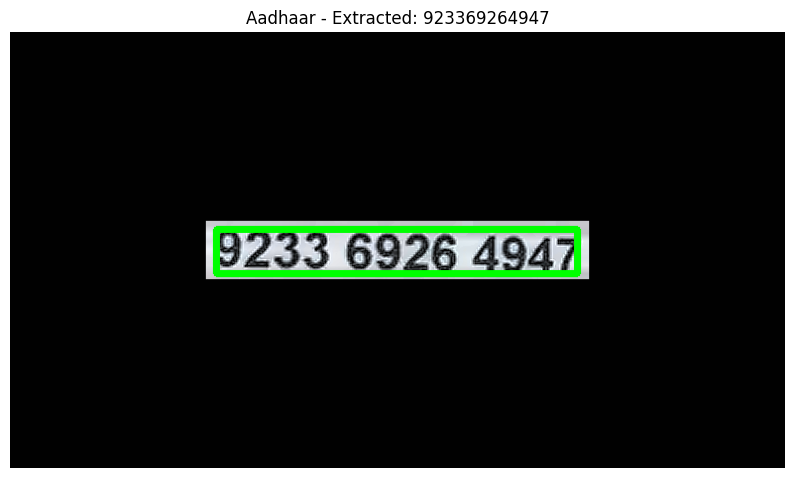

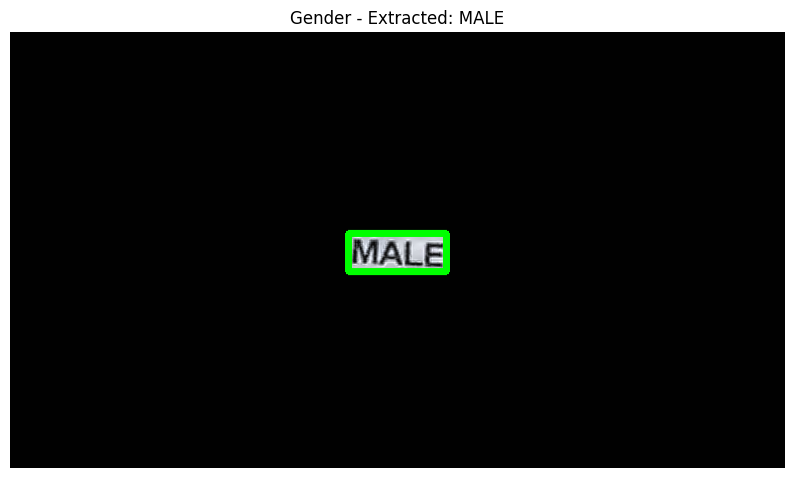

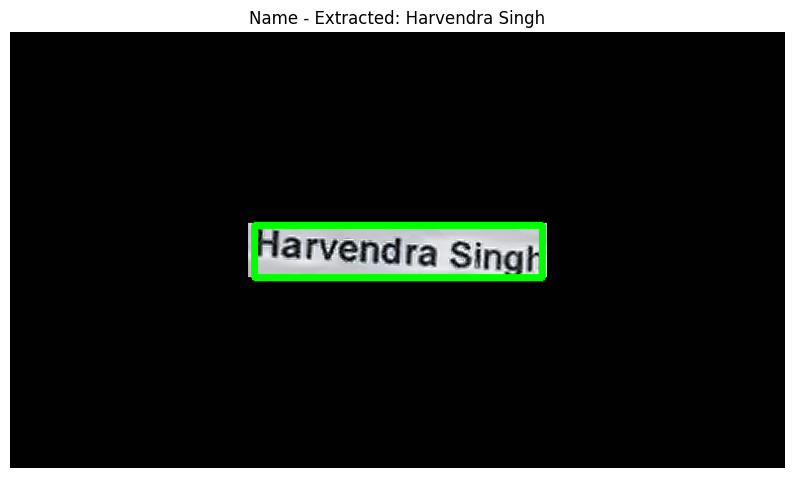

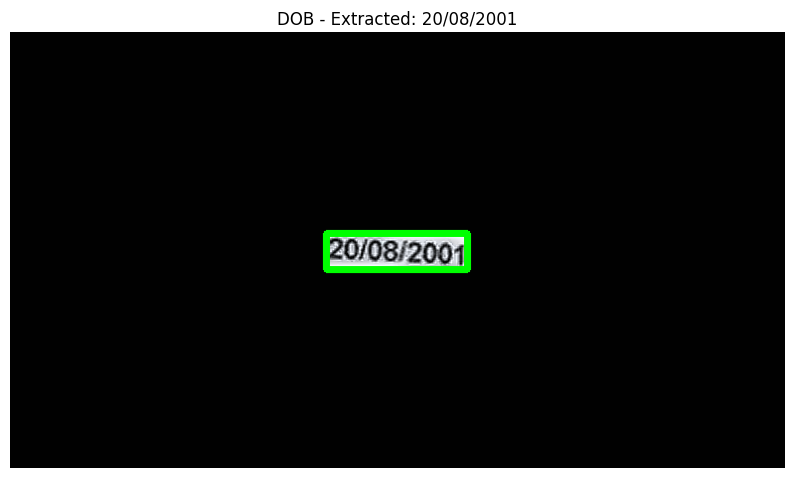


Aadhaar Card Results:
{
    "Aadhaar": "923369264947",
    "Gender": "MALE",
    "Name": "Harvendra Singh",
    "DOB": "20/08/2001"
}


In [ ]:
import json

print("\n=== Test 2: Aadhaar Card on aadhaar_front.jpg ===")
try:
    result = aadhaar(
        image_path="samples/aadhaar_front.jpg",
        save_json=True,
        output_json="detected_aadhaar.json",
        verbose=True
    )
    print("\nAadhaar Card Results:")
    print(json.dumps(result, indent=4))
except Exception as e:
    print(f"Error in Aadhaar Test: {e}")

## Step 6: Test Auto-Detection (Passport)

This cell uses `process_id` for auto-detection on a passport image. It classifies the ID, selects the appropriate detection model (`Passport`), and extracts text.

### Why This Matters
Auto-detection is ideal when the ID type is unknown. It:
- Uses `Id_Classifier` to identify the ID.
- Maps to the correct detection model via `config.json`.
- Performs detection and OCR seamlessly.

### What’s Happening
- Call `process_id` with `verbose=True` for visualizations.
- Save results to `detected_passport.json`.
- Print the extracted text.

**Expected Output**:
```
=== Test 3: Auto-Detection on passport_front.jpg ===
Detected document type: passport with confidence: 0.99
[Matplotlib visualizations]
Passport Results:
{
    "Address": "SHER SINGH WALA FARIDKOT PUNJAB",
    "Code": "NO461879",
    "DOB": "26/08/1996",
    "DOI": "18/06/2015",
    "EXP": "17/06/2025",
    "Gender": "F",
    "MRZ1": "P<INDSANDHU<<SHAMINDER<KAUR<<<<<<<<<<<<<<<<<",
    "MRZ2": "NO461879<4IND9608269F2506171<<<<<<<<<<<<<<<2",
    "Name": "SHAMINDER KAUR",
    "Nationality": "IND",
    "Nation": "INDIAN",
    "POI": "AMRITSAR"
}
```


=== Test 3: Auto-Detection on passport_front.jpg ===
Detected document type: passport with confidence: 1.00


models/Passport.pt:   0%|          | 0.00/51.2M [00:00<?, ?B/s]

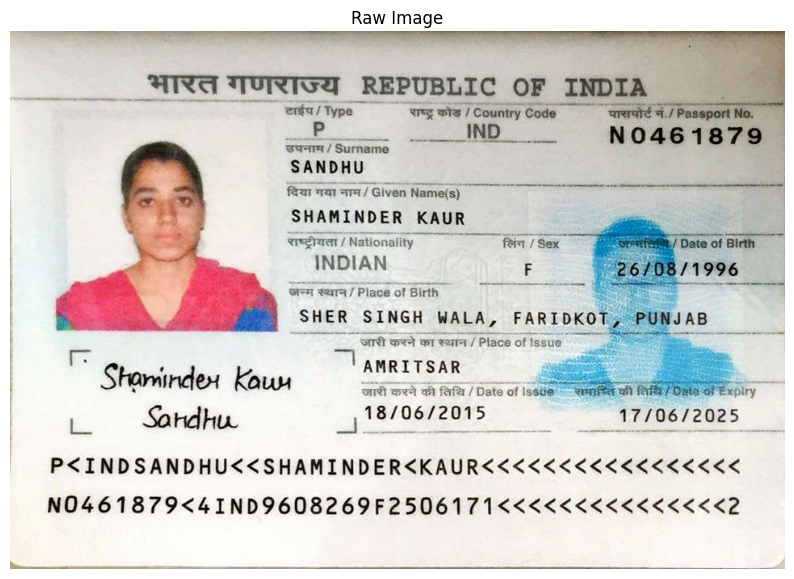

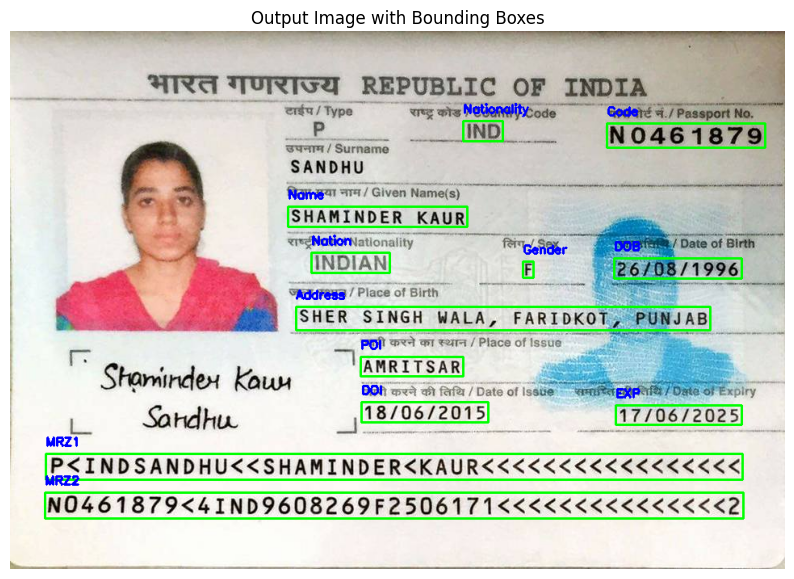

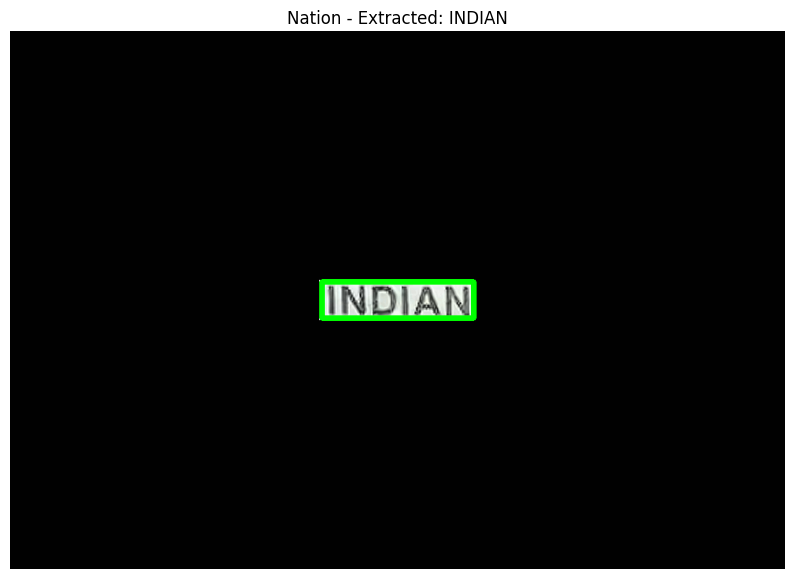

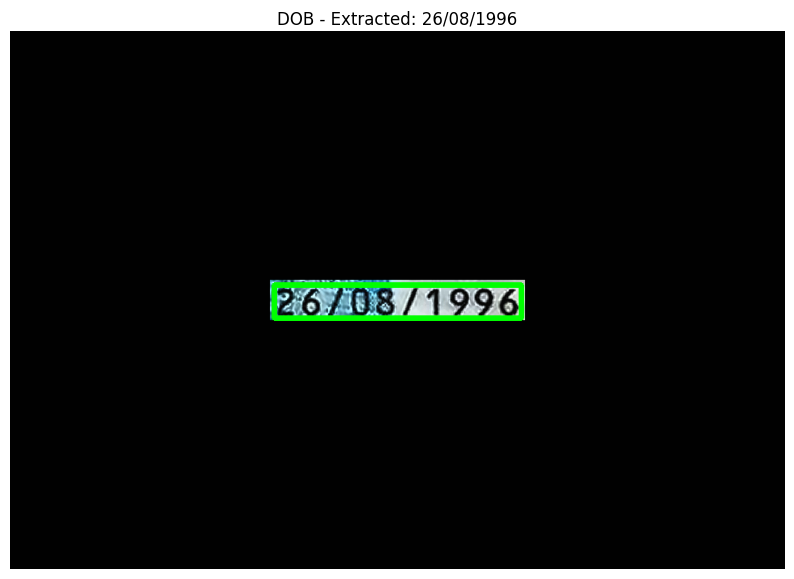

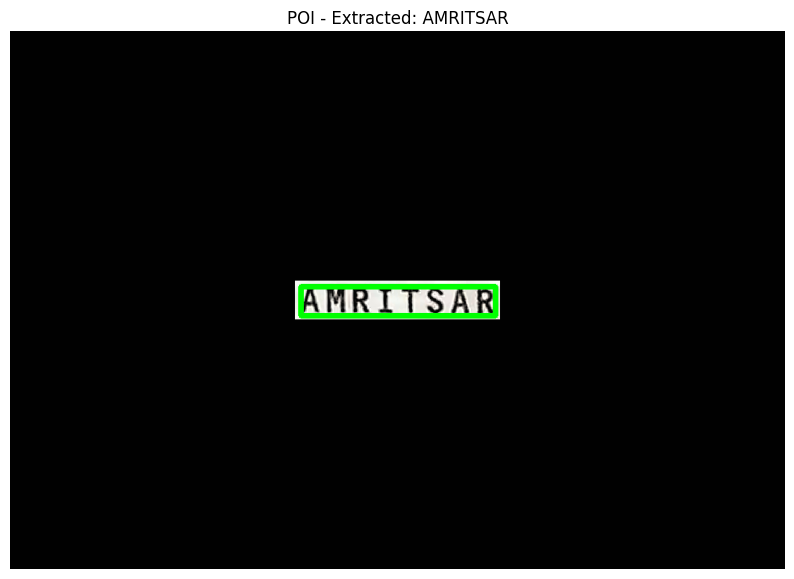

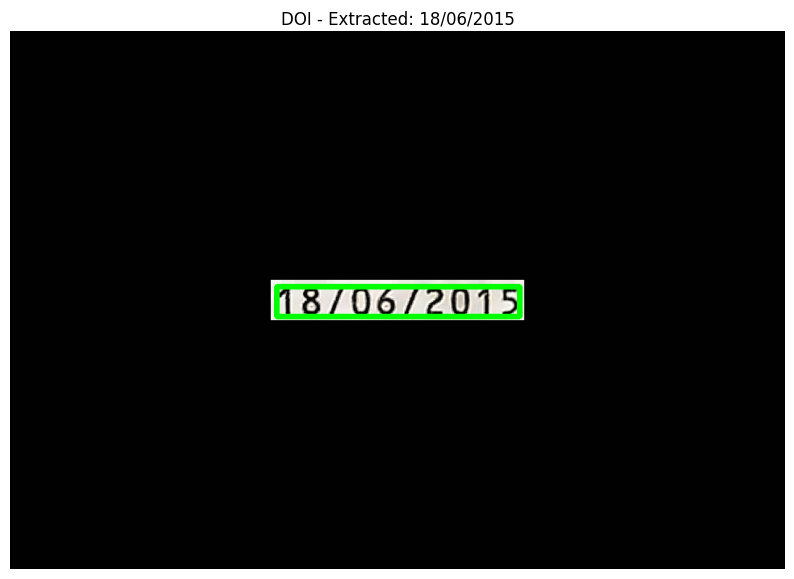

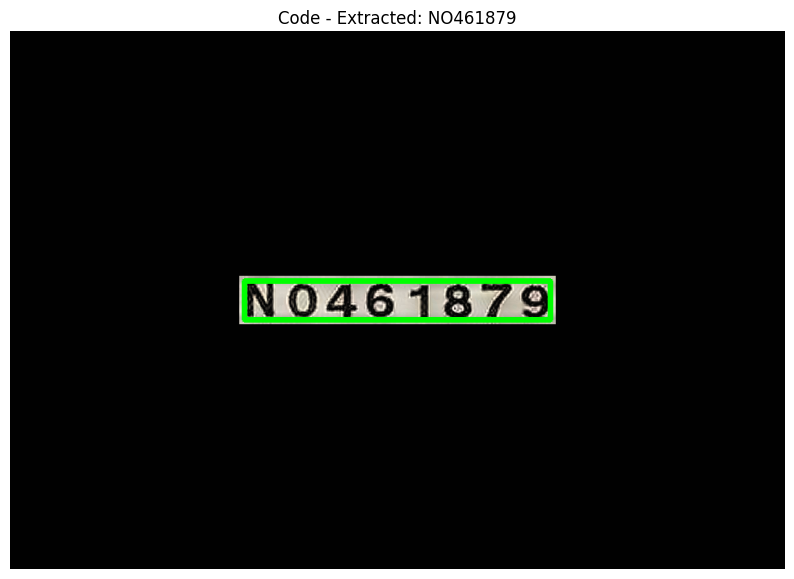

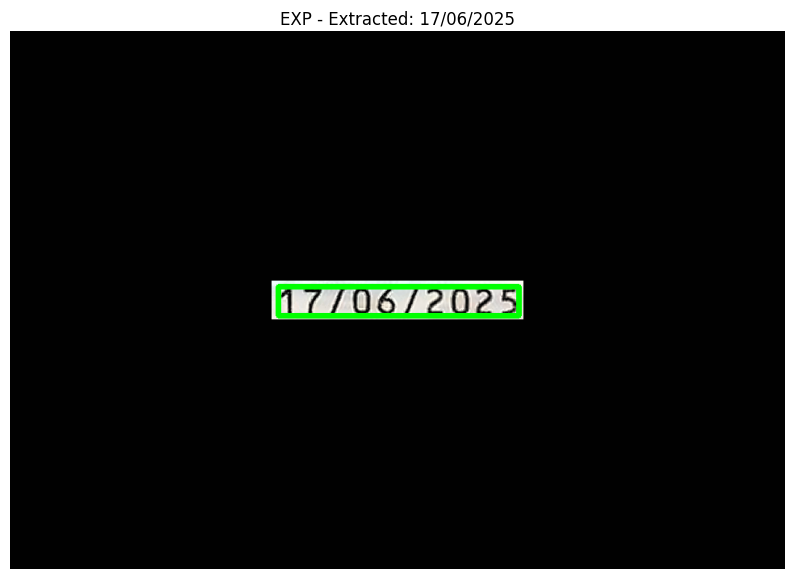

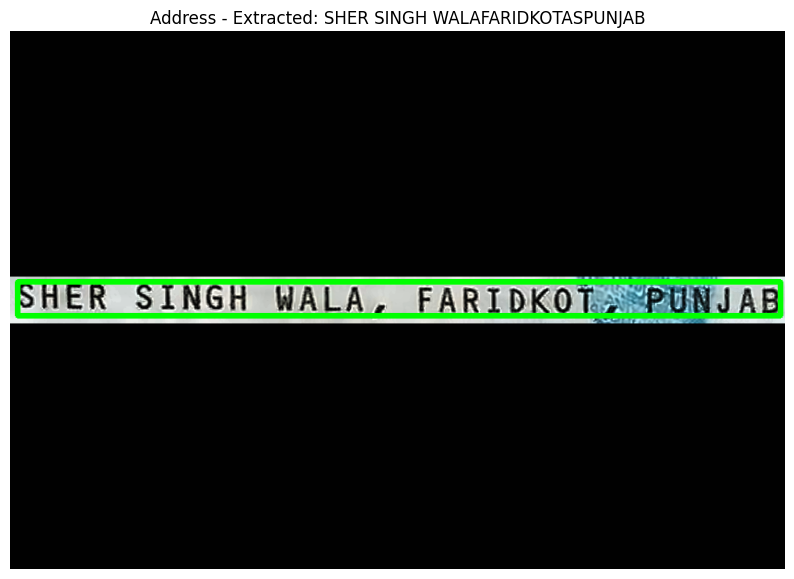

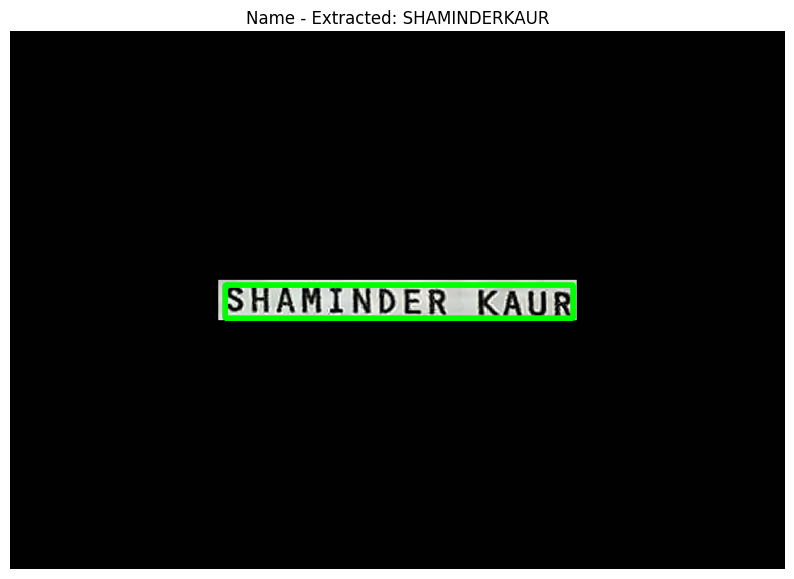

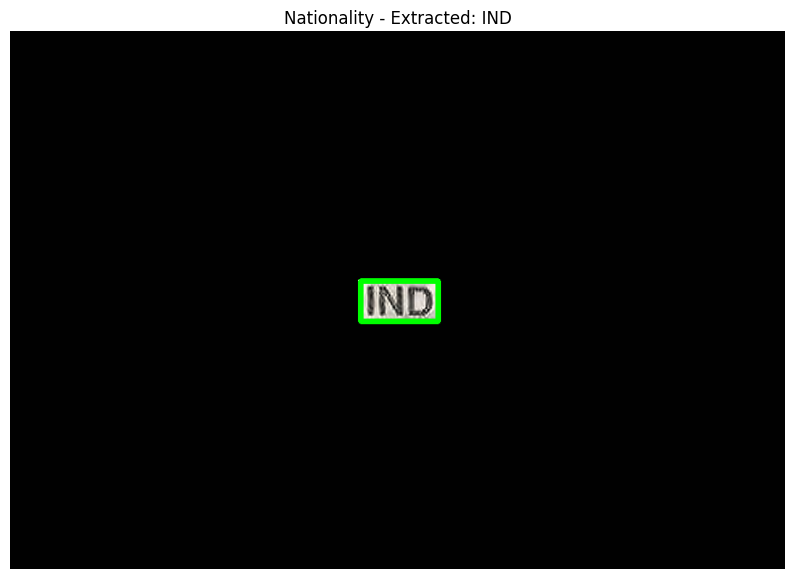

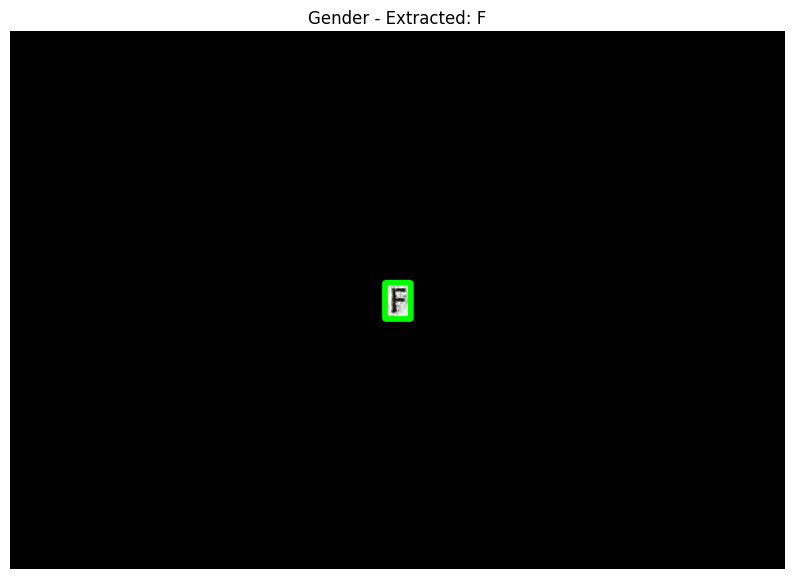

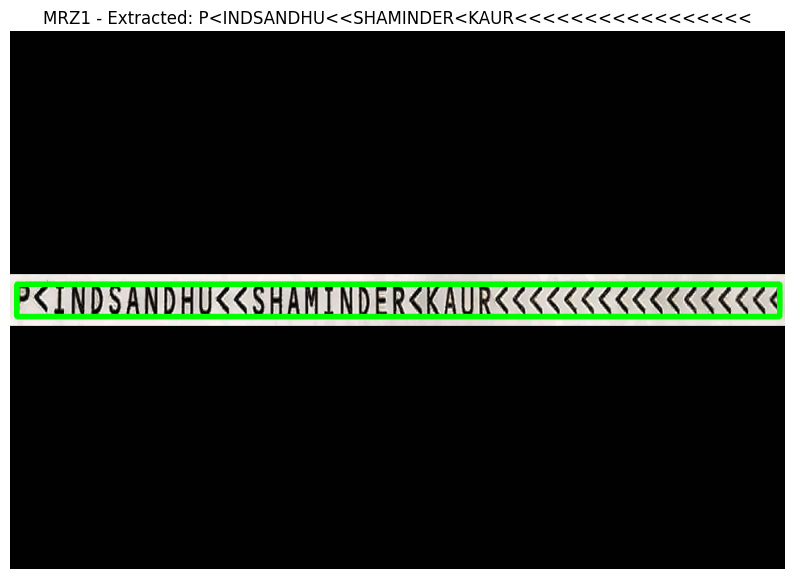

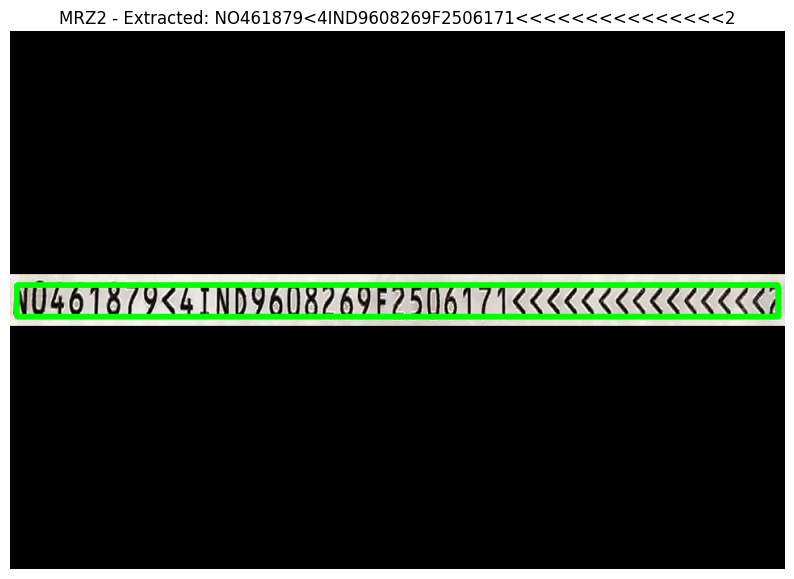


Passport Results:
{
    "Nation": "INDIAN",
    "DOB": "26/08/1996",
    "POI": "AMRITSAR",
    "DOI": "18/06/2015",
    "Code": "NO461879",
    "EXP": "17/06/2025",
    "Address": "SHER SINGH WALAFARIDKOTASPUNJAB",
    "Name": "SHAMINDERKAUR",
    "Nationality": "IND",
    "Gender": "F",
    "MRZ1": "P<INDSANDHU<<SHAMINDER<KAUR<<<<<<<<<<<<<<<<<",
    "MRZ2": "NO461879<4IND9608269F2506171<<<<<<<<<<<<<<<2"
}


In [ ]:
print("\n=== Test 3: Auto-Detection on passport_front.jpg ===")
try:
    result = process_id(
        image_path="samples/passport_front.jpg",
        save_json=True,
        output_json="detected_passport.json",
        verbose=True
    )
    print("\nPassport Results:")
    print(json.dumps(result, indent=4))
except Exception as e:
    print(f"Error in Passport Test: {e}")

## Step 7: Test Back Image (Aadhaar Back)

This cell tests the `Id_Classifier` on an Aadhaar back image. Since `aadhar_back` likely lacks a detection model (per `config.json`), it will classify the ID but return an empty result.

### Why This Matters
Back images (e.g., `aadhaar_back`, `voter_back`) are classified by `Id_Classifier` but may not support detection/OCR unless you’ve added models. This test shows how the model handles unmapped types.

### What’s Happening
- Call `process_id` with `classify_only=False` to attempt full processing.
- The classifier identifies `aadhar_back`, but no detection model is mapped, so it returns `{}`.
- A warning is logged (visible in logs).

**Expected Output**:
```
=== Test 4: Auto-Detection on aadhaar_back.jpg ===
Detected document type: aadhar_back with confidence: 0.97
No further processing for samples/aadhaar_back.jpg (unmapped document type detected).
```


=== Test 4: Auto-Detection on aadhaar_back.jpg ===
Detected document type: aadhar_back with confidence: 1.00


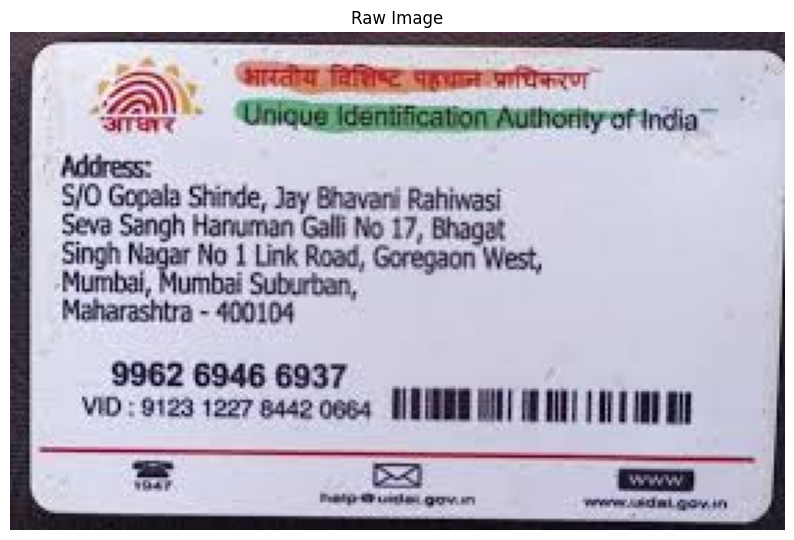

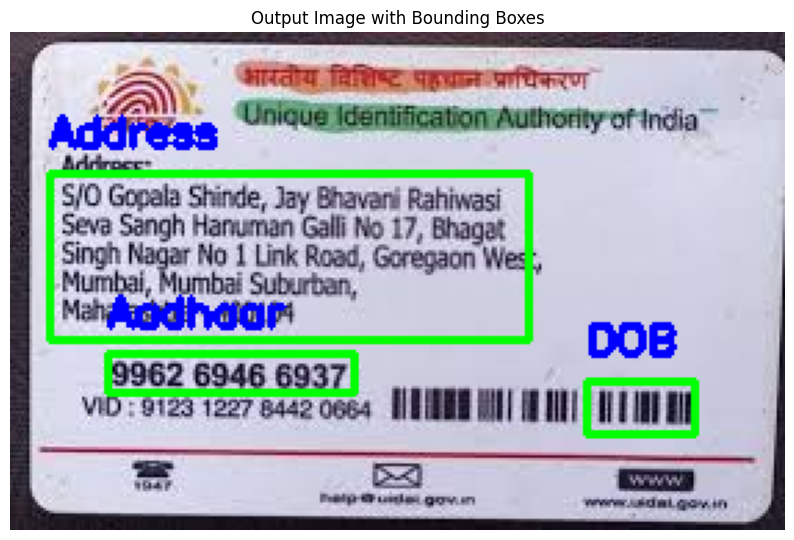

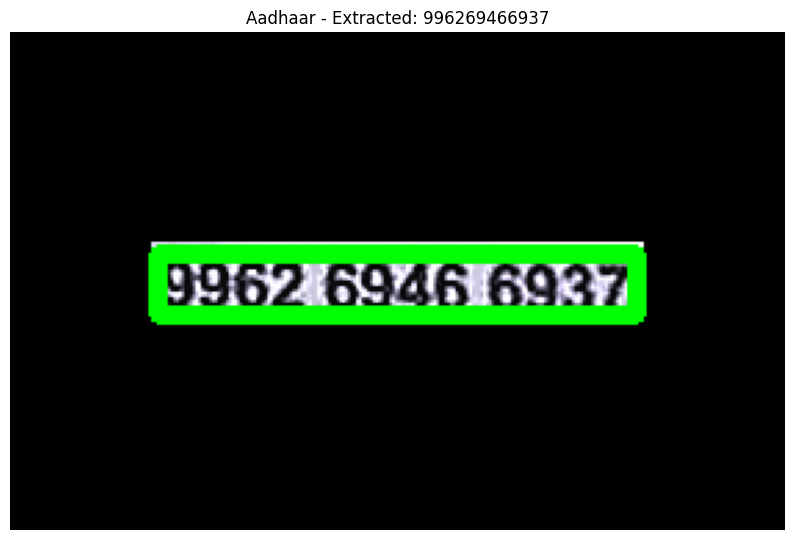

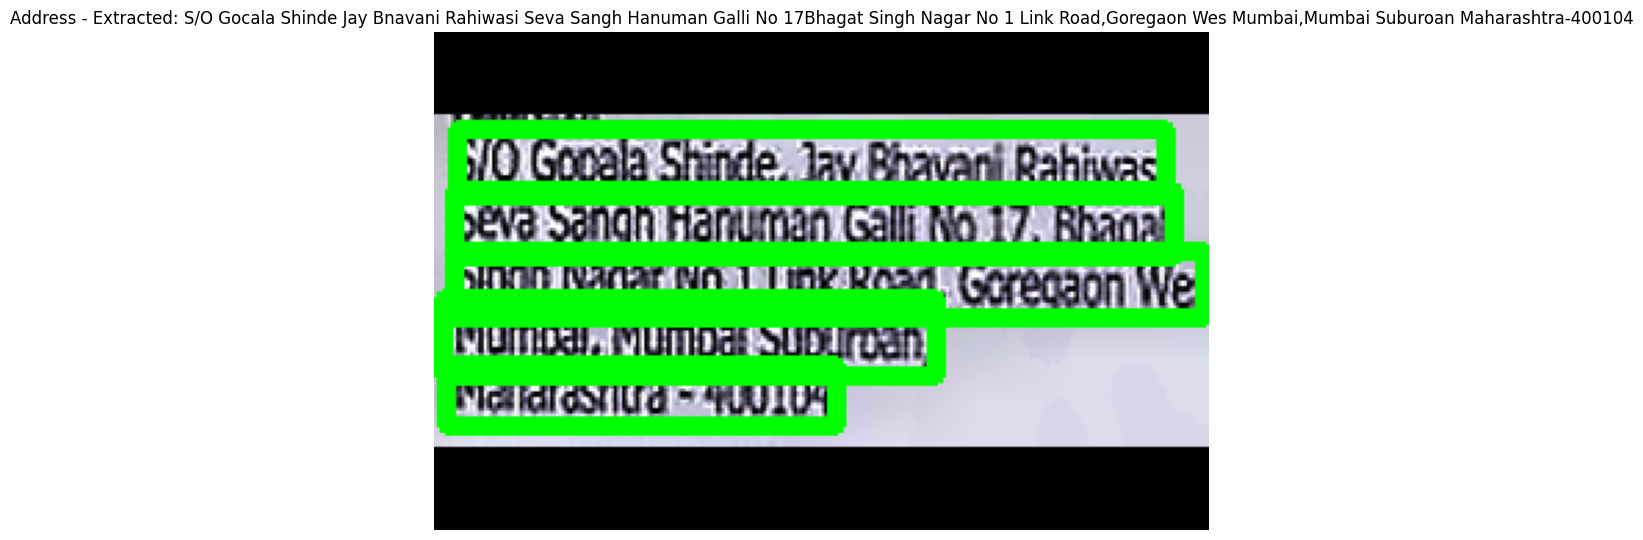

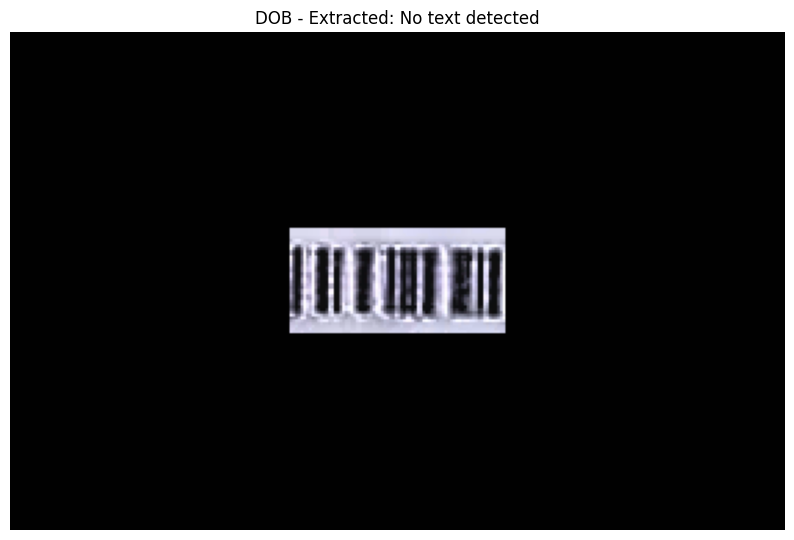


Aadhaar Back Results:
{
    "Aadhaar": "996269466937",
    "Address": "S/O Gocala Shinde Jay Bnavani Rahiwasi Seva Sangh Hanuman Galli No 17Bhagat Singh Nagar No 1 Link Road,Goregaon Wes Mumbai,Mumbai Suburoan Maharashtra-400104",
    "DOB": "No text detected"
}


In [ ]:
print("\n=== Test 4: Auto-Detection on aadhaar_back.jpg ===")
try:
    result = process_id(
        image_path="samples/aadhaar_back.jpg",
        save_json=False,
        verbose=True
    )
    if not result:
        print(f"No further processing for samples/aadhaar_back.jpg (unmapped document type detected).")
    else:
        print("\nAadhaar Back Results:")
        print(json.dumps(result, indent=4))
except Exception as e:
    print(f"Error in Aadhaar Back Test: {e}")

## Step 8: Upload and Test Your Own Image

This cell lets you upload your own ID image to test the model. You can classify the ID type or run full processing.

### Why This Matters
This playground feature allows users to experiment with their own images, making the model accessible for real-world testing.

### What’s Happening
1. Display an upload button using `google.colab.files`.
2. Save the uploaded image to `samples/uploaded_image.jpg`.
3. Run `process_id` with `classify_only=True` to classify the ID.
4. Run `process_id` again for full processing (if mapped).
5. Print results.

**Instructions**:
- Click “Choose Files” to upload an ID image (JPG/PNG).
- Wait for processing (may take a minute due to model loading).

**Expected Output**:
```
Upload your ID image:
[Upload button appears]
Processing uploaded image (classification)...
Detected document type: aadhar_front with confidence: 0.98
Processing uploaded image (full pipeline)...
[Matplotlib visualizations]
Uploaded Image Results:
{
    "Aadhaar": "1234 5678 9012",
    ...
}
```
If the ID type is unmapped (e.g., `aadhar_back`), full processing returns `{}`.


Upload your ID image:


Saving voter_back.jpg to voter_back.jpg

Processing uploaded image (classification)...
Detected document type: voter_id with confidence: 1.00

Processing uploaded image (full pipeline)...
Detected document type: voter_id with confidence: 1.00


models/Voter_Id.pt:   0%|          | 0.00/51.2M [00:00<?, ?B/s]

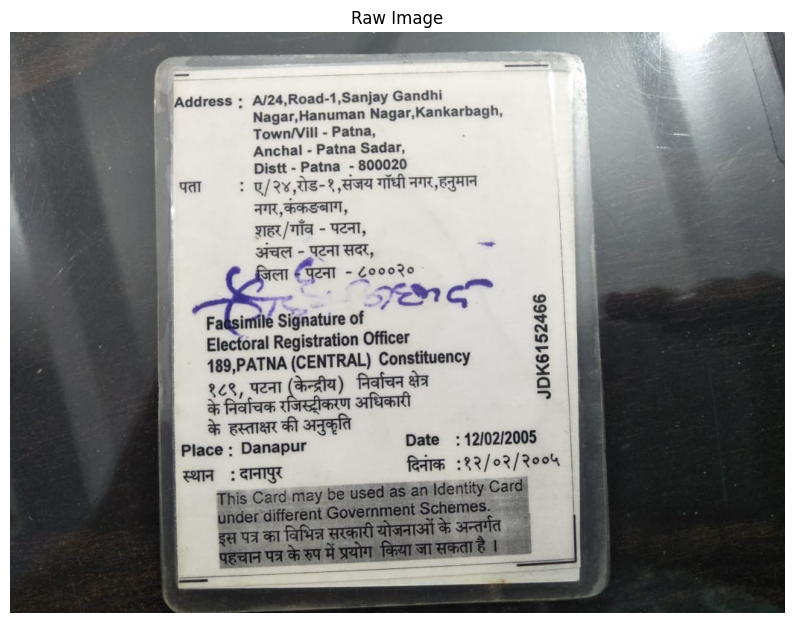

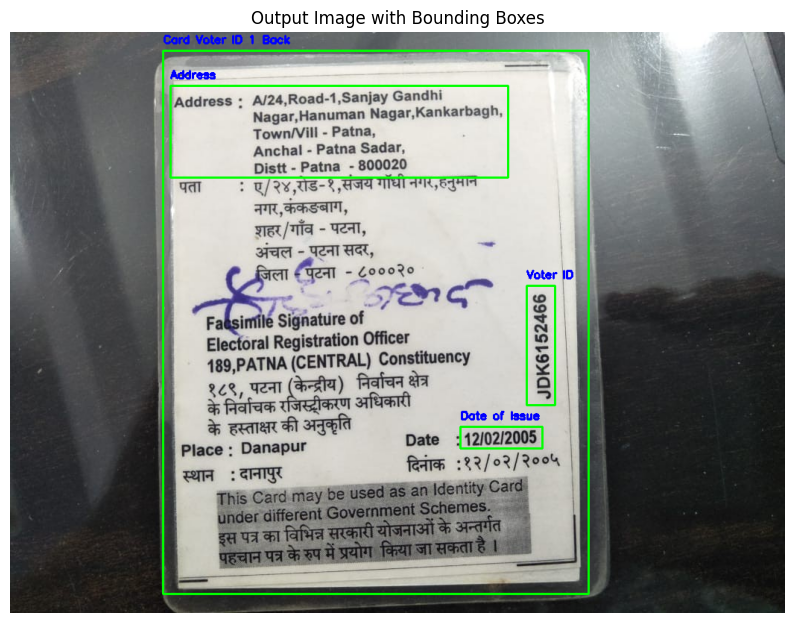

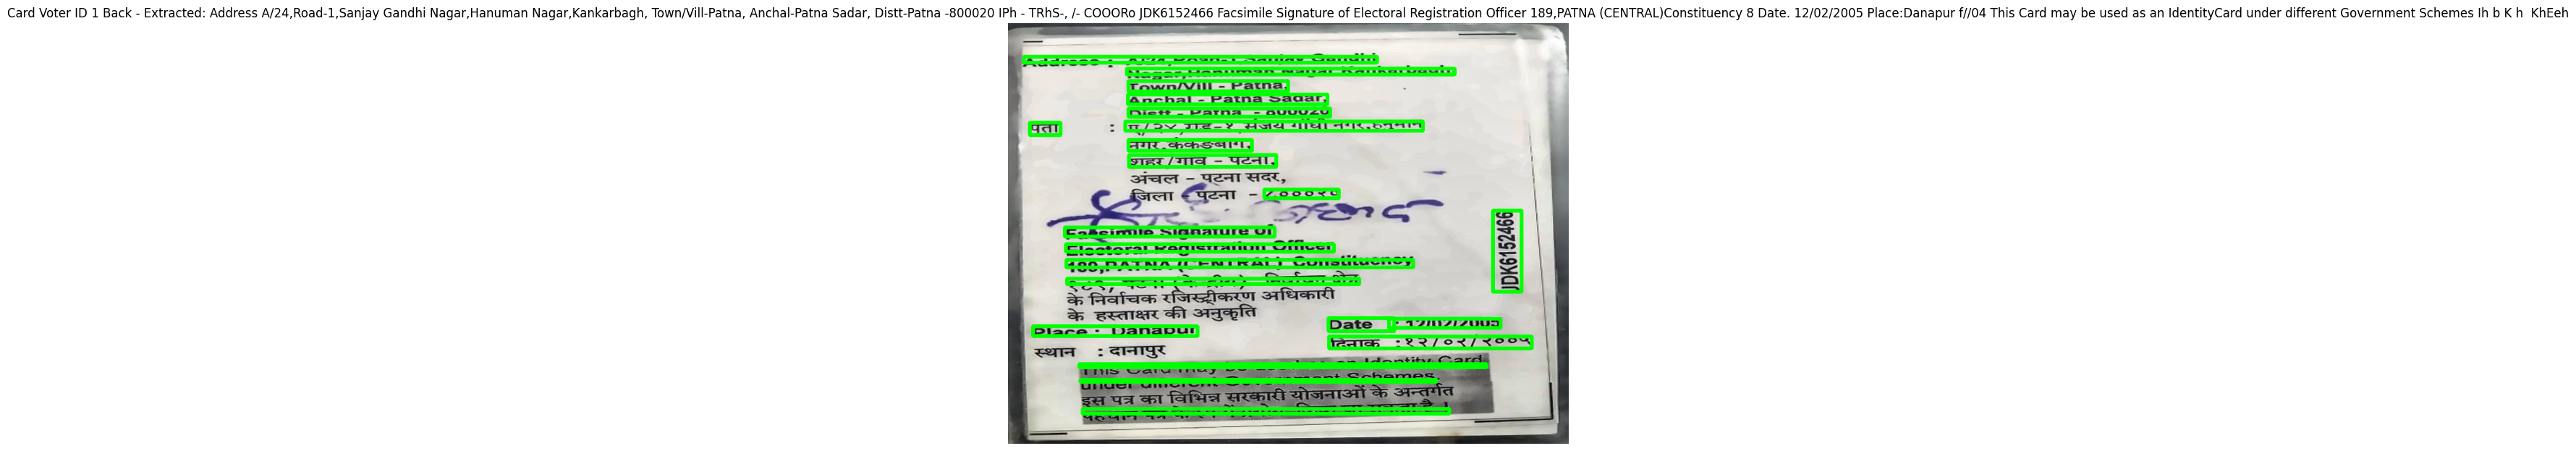

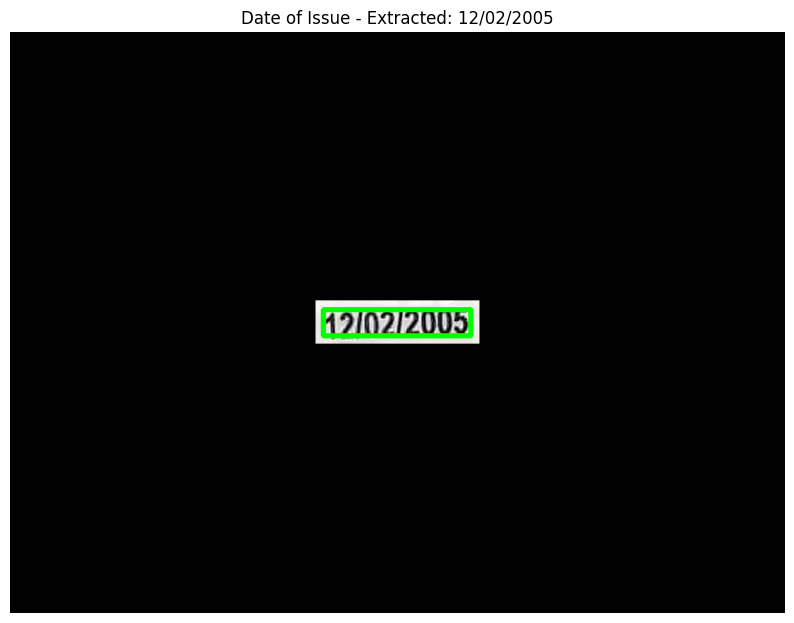

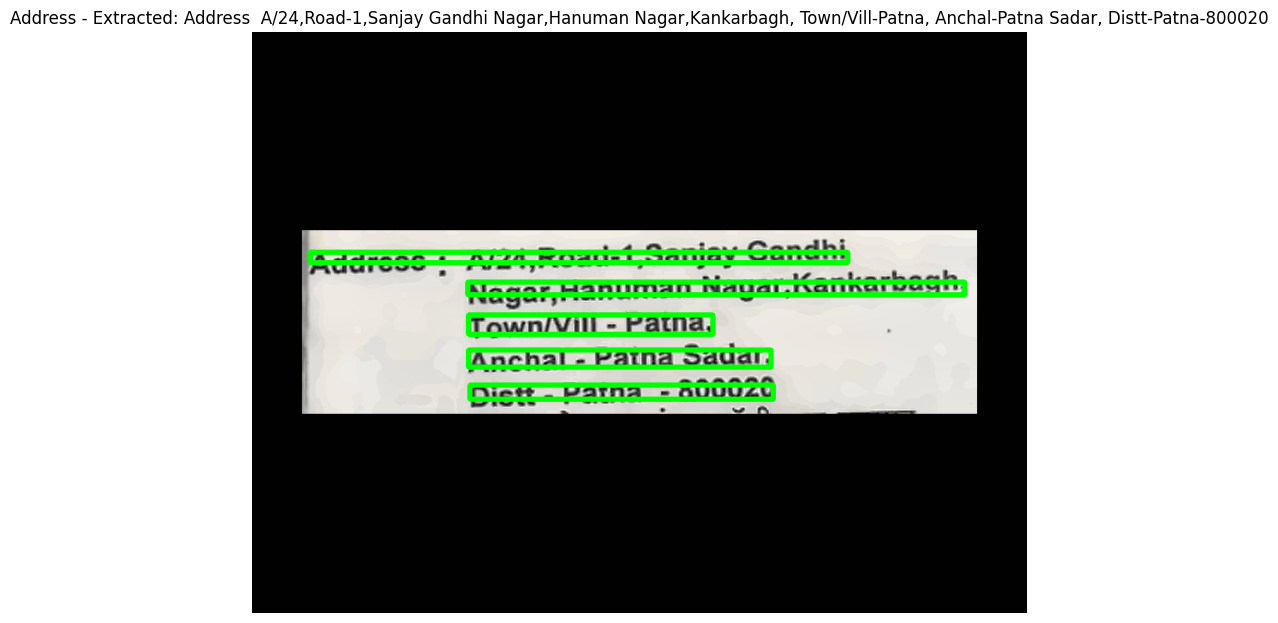

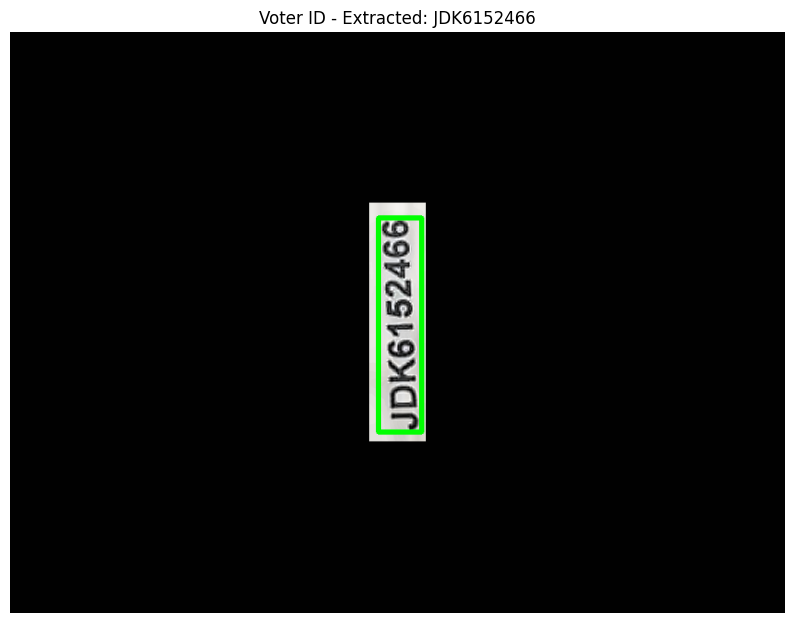


Uploaded Image Results:
{
    "Card Voter ID 1 Back": "Address A/24,Road-1,Sanjay Gandhi Nagar,Hanuman Nagar,Kankarbagh, Town/Vill-Patna, Anchal-Patna Sadar, Distt-Patna -800020 IPh - TRhS-, /- COOORo JDK6152466 Facsimile Signature of Electoral Registration Officer 189,PATNA (CENTRAL)Constituency 8 Date. 12/02/2005 Place:Danapur f//04 This Card may be used as an IdentityCard under different Government Schemes Ih b K h  KhEeh",
    "Date of Issue": "12/02/2005",
    "Address": "Address  A/24,Road-1,Sanjay Gandhi Nagar,Hanuman Nagar,Kankarbagh, Town/Vill-Patna, Anchal-Patna Sadar, Distt-Patna-800020",
    "Voter ID": "JDK6152466"
}


In [ ]:
from google.colab import files
import os

print("\nUpload your ID image:")
uploaded = files.upload()
for filename in uploaded.keys():
    os.makedirs("samples", exist_ok=True)
    with open("samples/uploaded_image.jpg", "wb") as f:
        f.write(uploaded[filename])
    print(f"\nProcessing uploaded image (classification)...")
    try:
        result = process_id(
            image_path="samples/uploaded_image.jpg",
            save_json=False,
            verbose=False,
            classify_only=True
        )
        print(f"\nProcessing uploaded image (full pipeline)...")
        result = process_id(
            image_path="samples/uploaded_image.jpg",
            save_json=True,
            output_json="detected_uploaded.json",
            verbose=True
        )
        print("\nUploaded Image Results:")
        print(json.dumps(result, indent=4))
    except Exception as e:
        print(f"Error processing uploaded image: {e}")

## Step 9: Verify Outputs

This cell checks the generated JSON files and displays the content of one for verification.

### Why This Matters
JSON files store extracted text, making it easy to integrate results into other applications. This step confirms the model’s outputs are saved correctly.

### What’s Happening
- List all `.json` files in the current directory.
- Display the content of `detected_aadhaar.json` as an example.

**Expected Output**:
```
=== Generated JSON Files ===
detected_aadhaar.json detected_passport.json ...

=== Content of detected_aadhaar.json ===
{
    "Aadhaar": "1234 5678 9012",
    "DOB": "01/01/1990",
    "Gender": "M",
    "Name": "John Doe",
    "Address": "123 Main St, City, State"
}
```

In [ ]:
print("\n=== Generated JSON Files ===")
!ls *.json

print("\n=== Content of detected_aadhaar.json ===")
try:
    with open("detected_aadhaar.json", "r") as f:
        print(json.dumps(json.load(f), indent=4))
except Exception as e:
    print(f"Error reading detected_aadhaar.json: {e}")


=== Generated JSON Files ===
detected_aadhaar.json  detected_passport.json  detected_uploaded.json

=== Content of detected_aadhaar.json ===
{
    "Aadhaar": "923369264947",
    "Gender": "MALE",
    "Name": "Harvendra Singh",
    "DOB": "20/08/2001"
}


## Step 10: Troubleshooting and Next Steps

This cell provides tips for common issues and suggests ways to extend the model’s use.

### Common Issues and Fixes
1. **No Output from `Id_Classifier`**:
   - Ensure `inference.py` has `classify_only` (check with `!grep "classify_only" inference.py`).
   - Verify `Id_Classifier.pt` exists: `!ls -l $(python -c "from huggingface_hub import hf_hub_download; print(hf_hub_download('logasanjeev/indian-id-validator', 'models/Id_Classifier.pt'))")`.
2. **Image Not Found**:
   - Check `samples/`: `!ls samples/`.
   - Redownload: `hf_hub_download("logasanjeev/indian-id-validator", "samples/aadhaar_front.jpg", local_dir=".")`.
3. **Dependency Errors**:
   - Verify versions: `!pip show numpy pandas ultralytics paddleocr paddlepaddle`.
   - Reinstall: `!pip install -q -r $(python -c "from huggingface_hub import hf_hub_download; print(hf_hub_download('logasanjeev/indian-id-validator', 'requirements.txt'))")`.
4. **Incorrect Classification**:
   - Inspect probabilities: Run `process_id("samples/passport_front.jpg", classify_only=True)`.

### Next Steps
- **Add Detection Models**: Create models for `aadhar_back` and `voter_back` and update `config.json`.
- **Integrate with Apps**: Use the model in a web app (e.g., Gradio, Flask).
- **Validate Fields**: Add regex validation (e.g., Aadhaar: `^\d{4}\s\d{4}\s\d{4}$`).
- **Explore the Model Card**: Visit [Hugging Face](https://huggingface.co/logasanjeev/indian-id-validator) for details.

**Expected Output**: No output, just guidance.